In [1]:
import numpy as np
import pandas as pd

In [2]:
fire_bkk = pd.read_csv("../../data/a1/bkk_firemap.csv")

In [3]:
fire_bkk

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,acq_datetime,distance_km
0,13.87908,100.35175,334.48,0.60,0.53,2018-04-03,706,N20,VIIRS,n,2,293.33,4.22,D,0,2018-04-03 07:06:00,25.081270
1,13.84944,100.34994,331.50,0.46,0.47,2018-04-06,609,N20,VIIRS,n,2,297.56,2.99,D,0,2018-04-06 06:09:00,23.162043
2,13.77165,100.59980,330.59,0.45,0.47,2018-04-06,609,N20,VIIRS,n,2,294.07,3.88,D,0,2018-04-06 06:09:00,9.512107
3,13.60762,100.71412,332.99,0.53,0.42,2018-04-11,615,N20,VIIRS,n,2,301.01,2.78,D,0,2018-04-11 06:15:00,24.500599
4,13.62025,100.74191,333.21,0.53,0.42,2018-04-11,615,N20,VIIRS,n,2,301.67,6.15,D,0,2018-04-11 06:15:00,26.399810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,13.57769,100.54063,334.33,0.40,0.37,2024-10-02,627,N20,VIIRS,n,2,295.94,1.52,D,0,2024-10-02 06:27:00,16.797063
604,13.61015,100.55387,346.56,0.38,0.36,2024-10-07,633,N20,VIIRS,n,2,296.34,3.16,D,0,2024-10-07 06:33:00,13.481424
605,13.66605,100.58886,341.19,0.40,0.37,2024-11-03,627,N20,VIIRS,n,2,298.58,2.32,D,0,2024-11-03 06:27:00,9.808326
606,13.66098,100.57847,335.96,0.40,0.37,2024-11-03,627,N20,VIIRS,n,2,298.76,2.30,D,0,2024-11-03 06:27:00,9.478153


Text(0.5, 1.0, 'Correlation Heatmap of Fire Data')

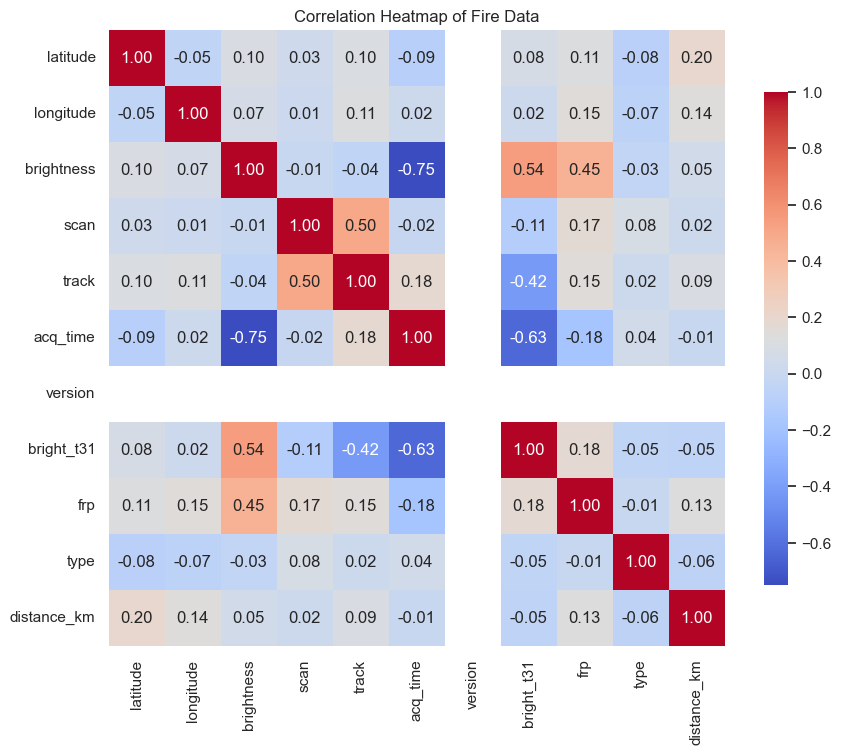

In [4]:
#plot correlation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted")
sns.set_context("notebook")
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = fire_bkk.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Fire Data")

In [5]:
use_df = fire_bkk[["acq_date", "brightness", "bright_t31"]]
use_df

,acq_date,brightness,bright_t31
0,2018-04-03,334.48,293.33
1,2018-04-06,331.50,297.56
2,2018-04-06,330.59,294.07
3,2018-04-11,332.99,301.01
4,2018-04-11,333.21,301.67
...,...,...,...
603,2024-10-02,334.33,295.94
604,2024-10-07,346.56,296.34
605,2024-11-03,341.19,298.58
606,2024-11-03,335.96,298.76


In [6]:
lat_lon = fire_bkk[["latitude", "longitude"]].drop_duplicates()
lat_lon

,latitude,longitude
0,13.87908,100.35175
1,13.84944,100.34994
2,13.77165,100.59980
3,13.60762,100.71412
4,13.62025,100.74191
...,...,...
603,13.57769,100.54063
604,13.61015,100.55387
605,13.66605,100.58886
606,13.66098,100.57847


C:\Users\poyni\AppData\Local\Temp\ipykernel_24836\2289577006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df["acq_date"] = pd.to_datetime(use_df["acq_date"])


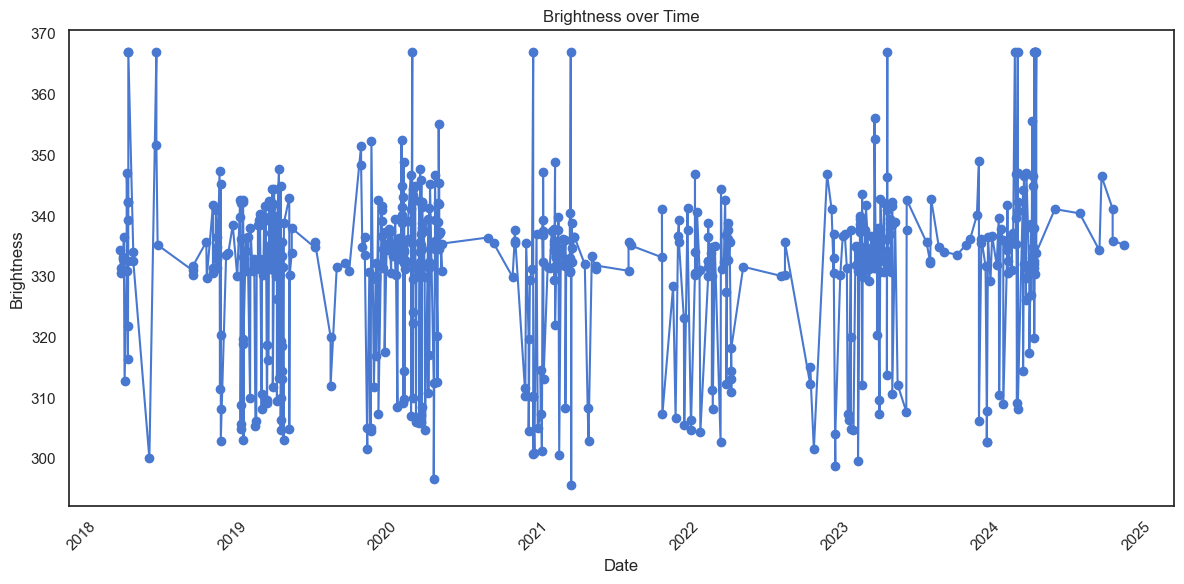

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure the date column is datetime
use_df["acq_date"] = pd.to_datetime(use_df["acq_date"])

plt.figure(figsize=(12, 6))
plt.plot(use_df["acq_date"], use_df["brightness"], marker="o", linestyle="-", color="b")



plt.title("Brightness over Time")
plt.xlabel("Date")
plt.ylabel("Brightness")

# Show ticks only once per year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only year

plt.xticks(rotation=45)  # Optional: makes the year labels readable
plt.tight_layout()
plt.show()


C:\Users\poyni\AppData\Local\Temp\ipykernel_24836\3352025207.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  use_df = use_df.resample("M").mean()


Text(0, 0.5, 'Brightness')

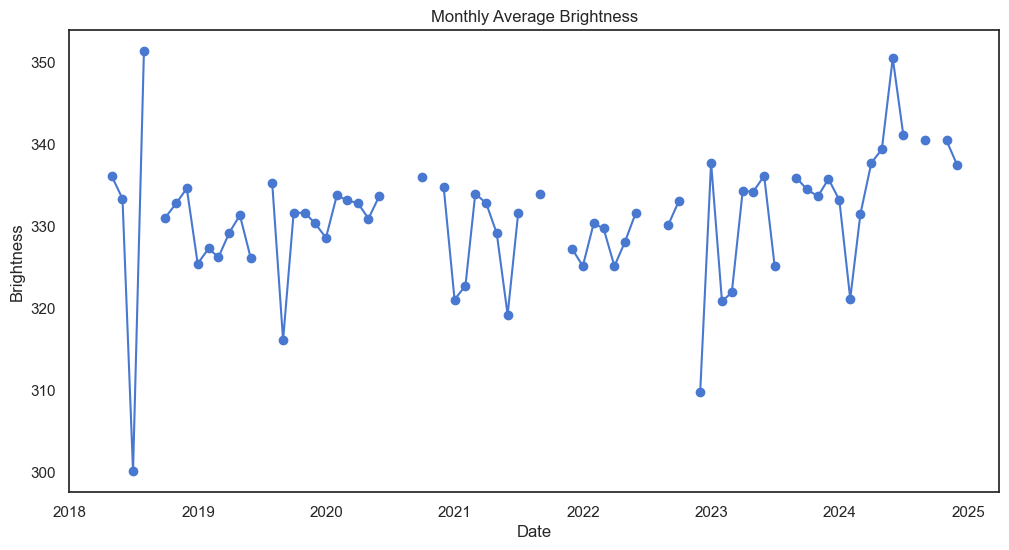

In [8]:
#resample as a monthly average
use_df.set_index("acq_date", inplace=True)
use_df = use_df.resample("M").mean()
use_df.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(use_df["acq_date"], use_df["brightness"], marker="o", linestyle="-", color="b")
plt.title("Monthly Average Brightness")
plt.xlabel("Date")
plt.ylabel("Brightness")

Text(0, 0.5, 'Brightness')

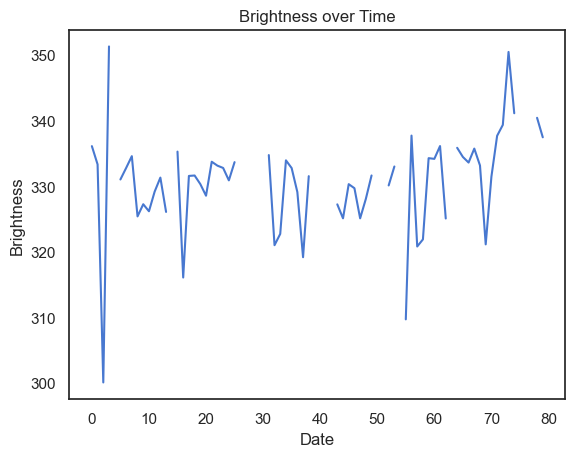

In [9]:
# keep in dataframe as a time series
use_df["brightness"].plot()
plt.title("Brightness over Time")
plt.xlabel("Date")
plt.ylabel("Brightness")

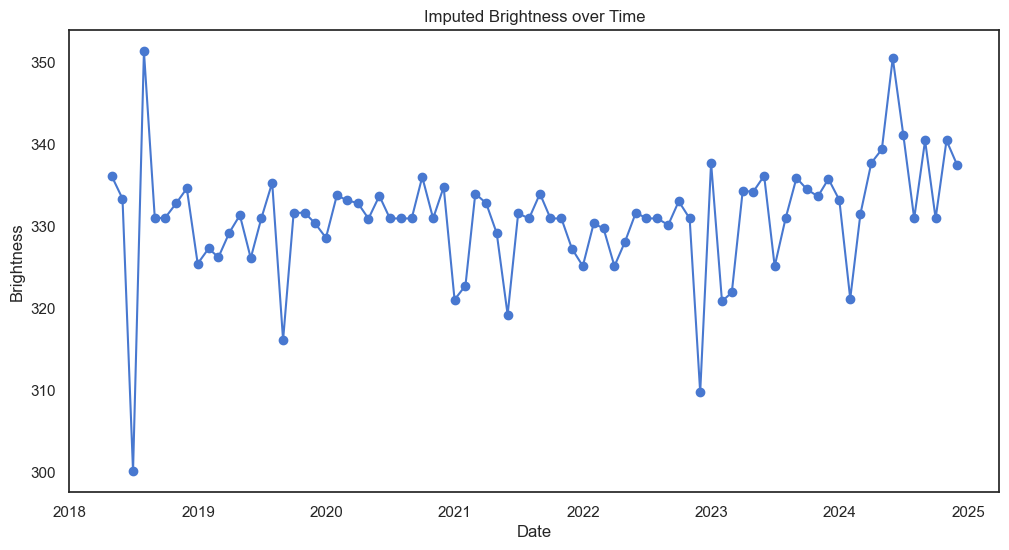

In [10]:
#now impute all data during months with missing data
#use knn imputer
from sklearn.impute import KNNImputer

# Create a KNN imputer object with 3 neighbors
imputer = KNNImputer(n_neighbors=3)
# Fit and transform the data
imputed_data = imputer.fit_transform(use_df[["brightness"]])
# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=["brightness"])
# Add the date column back
imputed_df["acq_date"] = use_df["acq_date"]
# Set the date column as index
imputed_df.set_index("acq_date", inplace=True)
# Plot the imputed data
plt.figure(figsize=(12, 6))
plt.plot(imputed_df.index, imputed_df["brightness"], marker="o", linestyle="-", color="b")
plt.title("Imputed Brightness over Time")
plt.xlabel("Date")
plt.ylabel("Brightness")
plt.show()

C:\Users\poyni\AppData\Local\Temp\ipykernel_24836\3352025207.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  use_df = use_df.resample("M").mean()


Text(0, 0.5, 'Brightness')

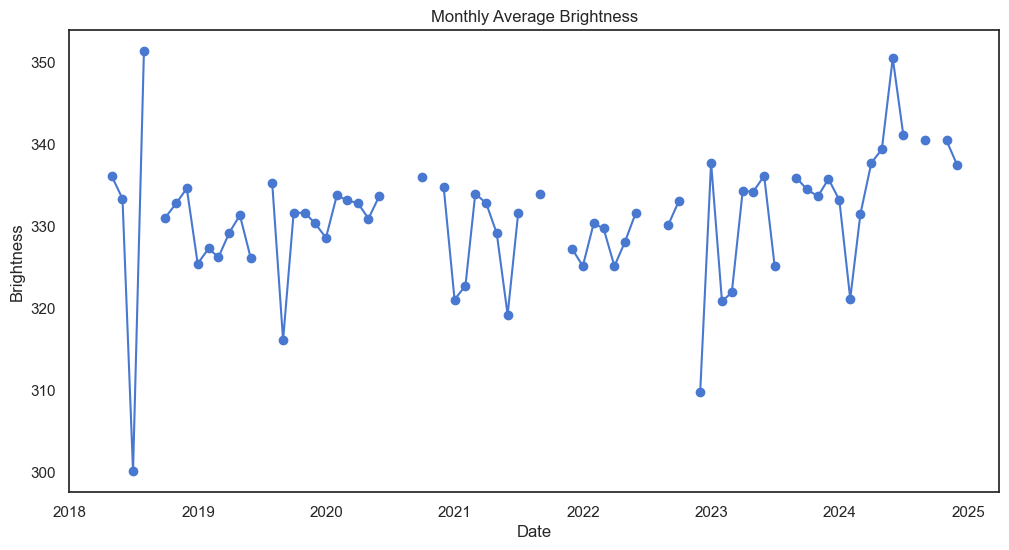

In [11]:
#resample as a monthly average
use_df.set_index("acq_date", inplace=True)
use_df = use_df.resample("M").mean()
use_df.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(use_df["acq_date"], use_df["brightness"], marker="o", linestyle="-", color="b")
plt.title("Monthly Average Brightness")
plt.xlabel("Date")
plt.ylabel("Brightness")

In [12]:
# save as series csv
imputed_df.to_csv("../../data/a1/bkk_firemap_imputed.csv", index=True)

<Figure size 1200x600 with 0 Axes>

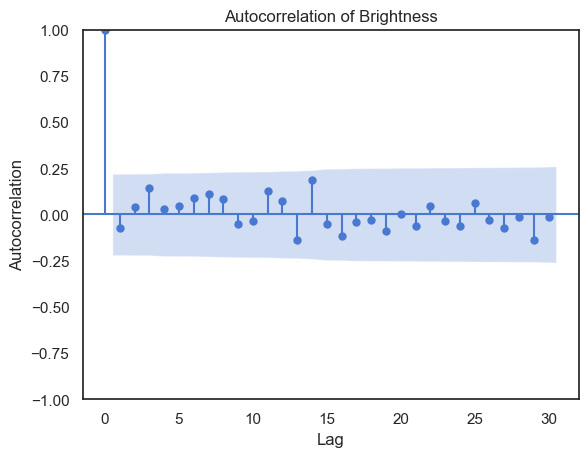

In [13]:
#auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(imputed_df["brightness"], lags=30)
plt.title("Autocorrelation of Brightness")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

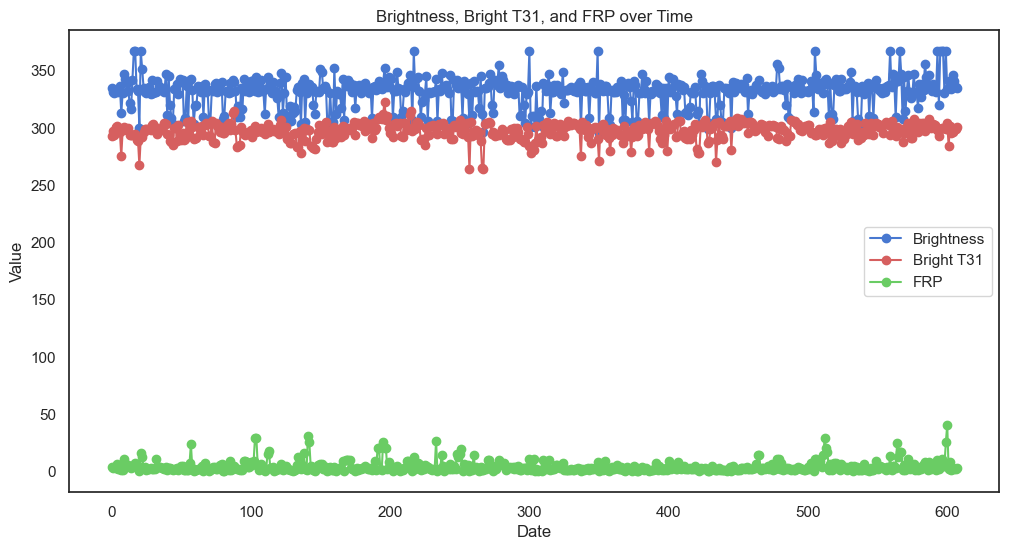

In [14]:
#plot brightness, bright_t31, frp in the same graph where confidence = h
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"], marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"], marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"], marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

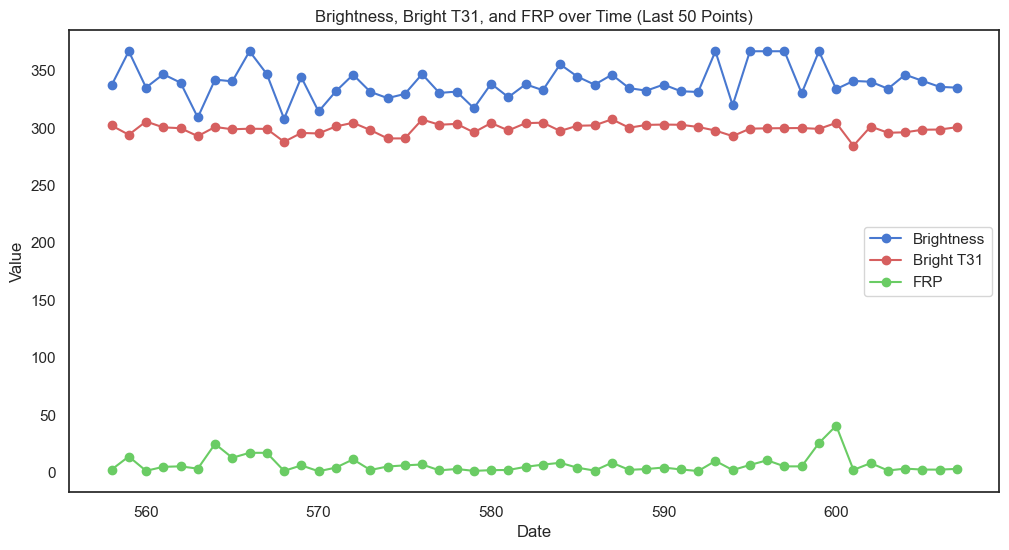

In [15]:
#plot on;y last 50 points
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"].tail(50), marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"].tail(50), marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"].tail(50), marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time (Last 50 Points)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

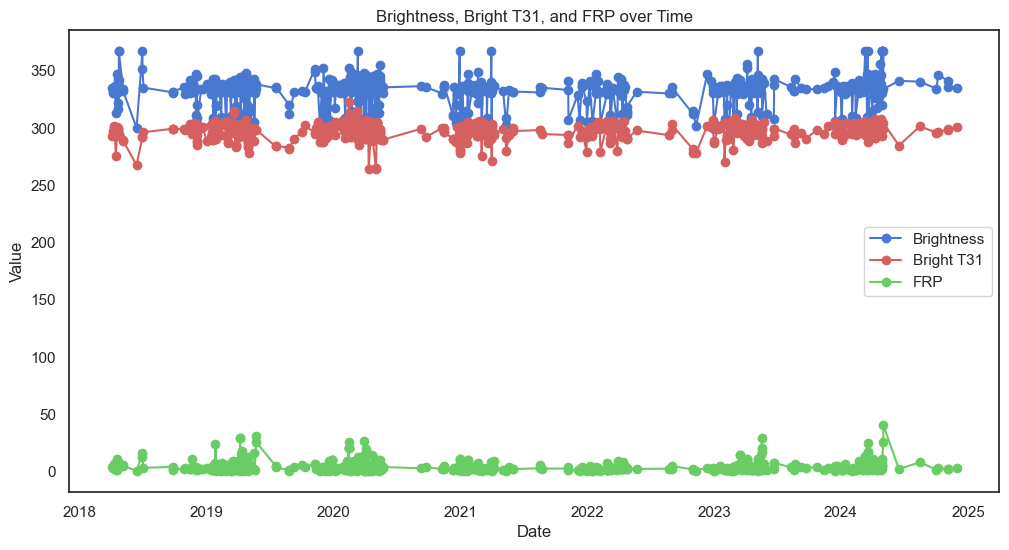

In [16]:
#now use act time as index and plot as time series
fire_bkk["acq_date"] = pd.to_datetime(fire_bkk["acq_date"])
fire_bkk.set_index("acq_date", inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"], marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"], marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"], marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

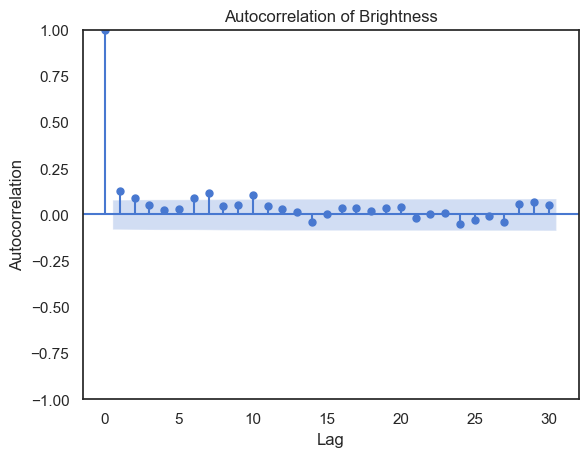

<Figure size 1200x600 with 0 Axes>

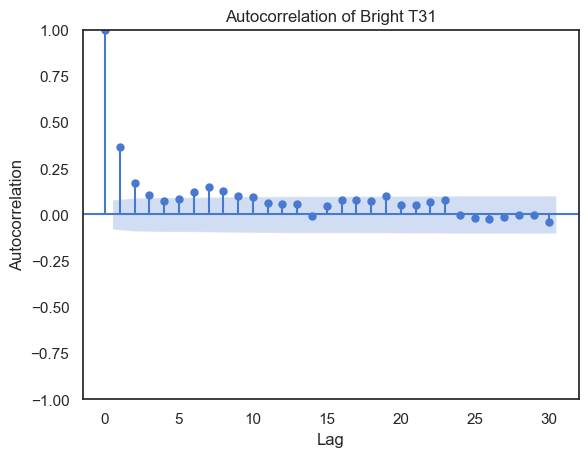

<Figure size 1200x600 with 0 Axes>

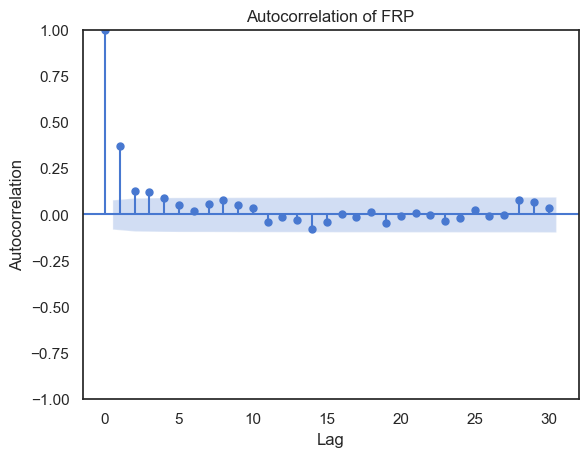

In [17]:
#auto correlation all three
plt.figure(figsize=(12, 6))
plot_acf(fire_bkk["brightness"], lags=30)
plt.title("Autocorrelation of Brightness")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(fire_bkk["bright_t31"], lags=30)
plt.title("Autocorrelation of Bright T31")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(fire_bkk["frp"], lags=30)
plt.title("Autocorrelation of FRP")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()


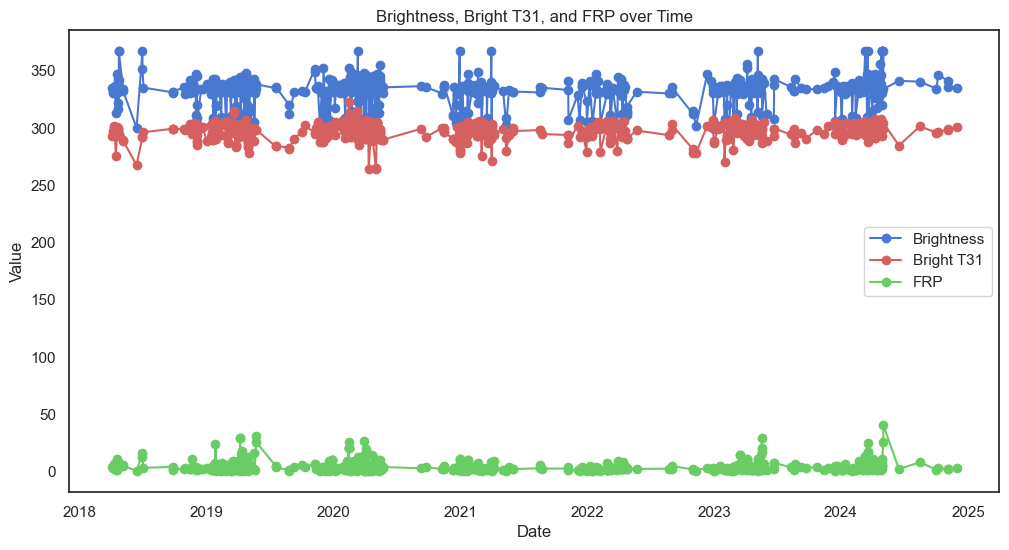

In [18]:
#if it have duplicates, drop them
fire_bkk.drop_duplicates(inplace=True)
#plot
plt.figure(figsize=(12, 6))
plt.plot(fire_bkk["brightness"], marker="o", linestyle="-", color="b", label="Brightness")
plt.plot(fire_bkk["bright_t31"], marker="o", linestyle="-", color="r", label="Bright T31")
plt.plot(fire_bkk["frp"], marker="o", linestyle="-", color="g", label="FRP")
plt.title("Brightness, Bright T31, and FRP over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()